# Data Preprocessing

In [1]:
#import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load data into a dataframe
df = pd.read_csv("Data/fer2013.csv")

In [3]:
#analyze the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [4]:
df.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


No handles with labels found to put in legend.


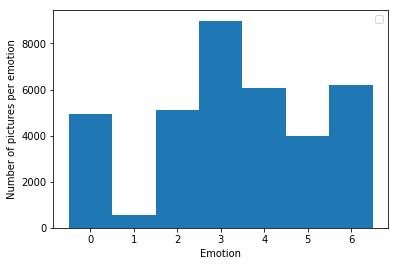

In [5]:
#plot the distribution of emotions
plt.hist(df['emotion'], bins=range(0,8), align='left')
plt.xlabel("Emotion")
plt.ylabel("Number of pictures per emotion")
plt.legend()
plt.show()

## Data Preprocessing

In [55]:
#split the 'pixels' string by whitespace and save the result as a list
X = df['pixels'].apply(np.core.defchararray.split)

In [56]:
#create a numpy array and transform str into int simultaneously
X = np.array([list(map(int, x)) for x in X])

In [57]:
#Reshape into a 3 dimensional numpy array
X = X.reshape(X.shape[0], 48, 48, 1)

In [58]:
#transform the emotion output into a numpy array
y = df['emotion'].values

## Data Splitting

In [60]:
#use the stratify command in order to keep the distributions similar
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)

## Draw the data

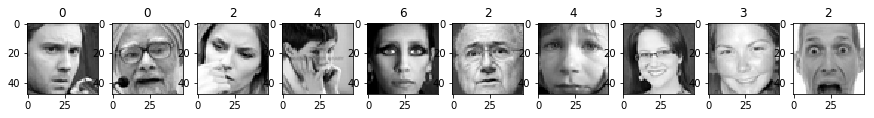

In [62]:
#draw the first 12 images
fig = plt.figure(figsize=(15, 15))
for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)
    ax.imshow(np.squeeze(X[i]), cmap='gray')
    ax.set_title(y[i])

## Data Rescaling

In [63]:
#between 0 and 1
#TODO Check distribution of X values
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

## One Hot Encoding

In [64]:
from keras.utils import np_utils

# one hot encoding for the 7 categories
y_train = np_utils.to_categorical(y_train, 7)
y_test = np_utils.to_categorical(y_test, 7)

# Multilayer Perceptron

In [65]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               1180160   
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 7)                 3591      
Total params: 1,446,407
Trainable params: 1,446,407
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [67]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='MLP_emotion.model.best.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10, 
                 validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

Train on 22967 samples, validate on 5742 samples
Epoch 1/10
22967/22967 [==============================] - 19s 831us/step - loss: 2.2999 - acc: 0.2251 - val_loss: 1.7997 - val_acc: 0.2579

Epoch 00001: val_loss improved from inf to 1.79972, saving model to MLP_emotion.model.best.hdf5
Epoch 2/10
22967/22967 [==============================] - 17s 723us/step - loss: 1.8099 - acc: 0.2513 - val_loss: 1.7846 - val_acc: 0.2659

Epoch 00002: val_loss improved from 1.79972 to 1.78456, saving model to MLP_emotion.model.best.hdf5
Epoch 3/10
22967/22967 [==============================] - 17s 723us/step - loss: 1.7789 - acc: 0.2720 - val_loss: 1.7731 - val_acc: 0.2856

Epoch 00003: val_loss improved from 1.78456 to 1.77305, saving model to MLP_emotion.model.best.hdf5
Epoch 4/10
22967/22967 [==============================] - 17s 725us/step - loss: 1.7568 - acc: 0.2921 - val_loss: 1.7326 - val_acc: 0.3032

Epoch 00004: val_loss improved from 1.77305 to 1.73258, saving model to MLP_emotion.model.best.

In [17]:
model.load_weights('MLP_emotion.model.best.hdf5')

In [18]:
from sklearn.metrics import confusion_matrix

categories = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
prediction = np.argmax(model.predict(X_test), axis=1)
true = np.argmax(y_test, axis = 1)

confusion_matrix(true, prediction)

array([[  51,    0,   10,  583,  254,   37,   56],
       [   3,    0,    2,   77,   19,    4,    4],
       [  46,    0,   21,  576,  255,   78,   48],
       [  13,    0,    6, 1541,  182,   32,   24],
       [  32,    0,   13,  630,  435,   21,   85],
       [  43,    0,   40,  346,  107,  224,   40],
       [  23,    0,   10,  729,  301,   25,  152]], dtype=int64)

## Convolutional Neural Networks

In [68]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(7, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 48, 48, 16)        80        
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 32)        2080      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 6, 6, 64)          0         
__________

In [69]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [71]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='CNN_emotion.model.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 22967 samples, validate on 5742 samples
Epoch 1/10
 - 56s - loss: 1.5546 - acc: 0.4014 - val_loss: 1.4952 - val_acc: 0.4377

Epoch 00001: val_loss improved from inf to 1.49515, saving model to CNN_emotion.model.best.hdf5
Epoch 2/10
 - 57s - loss: 1.4787 - acc: 0.4328 - val_loss: 1.4442 - val_acc: 0.4599

Epoch 00002: val_loss improved from 1.49515 to 1.44419, saving model to CNN_emotion.model.best.hdf5
Epoch 3/10
 - 55s - loss: 1.4178 - acc: 0.4603 - val_loss: 1.4362 - val_acc: 0.4523

Epoch 00003: val_loss improved from 1.44419 to 1.43625, saving model to CNN_emotion.model.best.hdf5
Epoch 4/10
 - 57s - loss: 1.3692 - acc: 0.4798 - val_loss: 1.3778 - val_acc: 0.4784

Epoch 00004: val_loss improved from 1.43625 to 1.37784, saving model to CNN_emotion.model.best.hdf5
Epoch 5/10
 - 54s - loss: 1.3242 - acc: 0.4925 - val_loss: 1.3762 - val_acc: 0.4772

Epoch 00005: val_loss improved from 1.37784 to 1.37624, saving model to CNN_emotion.model.best.hdf5
Epoch 6/10
 - 52s - loss: 1.29

In [74]:
model.load_weights('CNN_emotion.model.best.hdf5')

from sklearn.metrics import confusion_matrix

categories = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
prediction = np.argmax(model.predict(X_test), axis=1)
true = np.argmax(y_test, axis = 1)

confusion_matrix(true, prediction)

array([[ 348,    2,   34,  262,  124,   28,  193],
       [  23,   16,    7,   28,   12,    6,   17],
       [ 119,    2,  161,  225,  167,  142,  208],
       [  39,    0,   10, 1547,   62,   35,  105],
       [ 135,    3,   51,  330,  367,   18,  312],
       [  21,    1,   37,  126,   21,  541,   53],
       [  74,    0,   29,  261,  123,   27,  726]], dtype=int64)